In [1]:
#Importing the libraries

import numpy as np

import pandas as pd

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import skew,kurtosis,zscore

<p style='color:blue'><b>Data Understanding</b></p>

In [2]:
#Read customersData file

customer_df = pd.read_excel("Data/CustomersData.xlsx")

customer_df.head(3)

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33


In [3]:
#Read Discount file

discount_df = pd.read_csv("Data/Discount_Coupon.csv")

discount_df.head(3)

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30


In [4]:
#Read Online Sales file

sales_df = pd.read_csv("Data/Online_Sales.csv")

sales_df.head(3)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used


In [5]:
#Read tax file

tax_df = pd.read_excel("Data/Tax_amount.xlsx")

tax_df.head(3)

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18


In [6]:
#Read Marketing Spend file

market_spend_df = pd.read_csv("Data/Marketing_Spend.csv")

market_spend_df.head(3)

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38


In [7]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


In [8]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [9]:
#joining the dataframes - customer_df and sales_df on customerid 

df1 = pd.merge(sales_df,customer_df, on='CustomerID')

df1 = df1[['CustomerID', 'Gender', 'Location',
           'Tenure_Months', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
           'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
           'Delivery_Charges', 'Coupon_Status']]
df1.head()


,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,M,Chicago,12,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,M,Chicago,12,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,M,Chicago,12,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,M,Chicago,12,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,M,Chicago,12,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [10]:
#joining the dataframes df1, and tax_df on 'Product_Category'

df2 = pd.merge(df1, tax_df, on='Product_Category')

df2.head(2)

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST
0,17850,M,Chicago,12,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1
1,17850,M,Chicago,12,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1


<p style='color:blue'><b>Feature Generation</b></p>

In [11]:
df2['Transaction_Date'] = df2['Transaction_Date'].astype('datetime64[ns]')

#Extracting the Month, Weekday from the transaction date from 'Transaction_Date' column in the df2

df2['Month'] = df2['Transaction_Date'].dt.strftime('%b')

df2['Weekday'] = df2['Transaction_Date'].dt.day_name(locale='English')

df2[['Transaction_Date','Month','Weekday']].head(2)

,Transaction_Date,Month,Weekday
0,2019-01-01,Jan,Tuesday
1,2019-01-01,Jan,Tuesday


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Gender               52924 non-null  object        
 2   Location             52924 non-null  object        
 3   Tenure_Months        52924 non-null  int64         
 4   Transaction_ID       52924 non-null  int64         
 5   Transaction_Date     52924 non-null  datetime64[ns]
 6   Product_SKU          52924 non-null  object        
 7   Product_Description  52924 non-null  object        
 8   Product_Category     52924 non-null  object        
 9   Quantity             52924 non-null  int64         
 10  Avg_Price            52924 non-null  float64       
 11  Delivery_Charges     52924 non-null  float64       
 12  Coupon_Status        52924 non-null  object        
 13  GST                  52924 non-

In [13]:
discount_df['Month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [14]:
df2['Month'].unique()

array(['Jan', 'Dec', 'Aug', 'Mar', 'Jun', 'Sep', 'Nov', 'Feb', 'Apr',
       'May', 'Jul', 'Oct'], dtype=object)

In [15]:
df2['Product_Category'].unique()

array(['Nest-USA', 'Office', 'Apparel', 'Bags', 'Drinkware', 'Lifestyle',
       'Waze', 'Headgear', 'Fun', 'Google', 'Notebooks & Journals',
       'Backpacks', 'Nest-Canada', 'Housewares', 'Bottles', 'Nest',
       'Android', 'Accessories', 'Gift Cards', 'More Bags'], dtype=object)

In [16]:
discount_df['Product_Category'].unique()

array(['Apparel', 'Nest-USA', 'Office', 'Drinkware', 'Lifestyle', 'Bags',
       'Notebooks', 'Headgear', 'Nest', 'Waze', 'Bottles', 'Nest-Canada',
       'Housewares', 'Accessories', 'Gift Cards', 'Notebooks & Journals',
       'Android'], dtype=object)

In [17]:
discount_df.head(2)

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20


In [18]:
#Merging the discount_df with df2 based on 'Product_Category' & 'Month'

data = pd.merge(df2,discount_df, on=['Month','Product_Category'], how='left')

data = data[['CustomerID', 'Gender', 'Location', 'Tenure_Months', 'Transaction_ID',
       'Transaction_Date', 'Month', 'Weekday', 'Product_SKU', 'Product_Description',
       'Product_Category', 'Quantity', 'Avg_Price', 'GST', 'Delivery_Charges',
       'Coupon_Status', 'Coupon_Code',
       'Discount_pct']]

data.head(2)

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Month,Weekday,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,GST,Delivery_Charges,Coupon_Status,Coupon_Code,Discount_pct
0,17850,M,Chicago,12,16679,2019-01-01,Jan,Tuesday,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,0.1,6.5,Used,ELEC10,10.0
1,17850,M,Chicago,12,16680,2019-01-01,Jan,Tuesday,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,0.1,6.5,Used,ELEC10,10.0


<b>Feature Generation</b>

In [19]:
data['Coupon_Status'].value_counts()

#data['CouponUsage_Like']

data['Coupon_Likelihood'] = data['Coupon_Status'].apply(lambda x: 1 if x in ['Clicked', 'Used'] else 0)

data['Coupon_Used'] = data['Coupon_Status'].apply(lambda x: 1 if x in ['Used'] else 0)

data[['Product_SKU','Product_Description', 'Coupon_Status', 'Coupon_Likelihood','Coupon_Used']].head()

,Product_SKU,Product_Description,Coupon_Status,Coupon_Likelihood,Coupon_Used
0,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Used,1,1
1,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Used,1,1
2,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Not Used,0,0
3,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Clicked,1,0
4,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Clicked,1,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Gender               52924 non-null  object        
 2   Location             52924 non-null  object        
 3   Tenure_Months        52924 non-null  int64         
 4   Transaction_ID       52924 non-null  int64         
 5   Transaction_Date     52924 non-null  datetime64[ns]
 6   Month                52924 non-null  object        
 7   Weekday              52924 non-null  object        
 8   Product_SKU          52924 non-null  object        
 9   Product_Description  52924 non-null  object        
 10  Product_Category     52924 non-null  object        
 11  Quantity             52924 non-null  int64         
 12  Avg_Price            52924 non-null  float64       
 13  GST                  52924 non-

<p style='color:blue'><b>Handling DataTypes</b></p>

In [21]:
columns = ['CustomerID', 'Transaction_ID']

'''
Function to convert the datatype of the column to object string
'''
def convert_as_str(df, columns):
    for col in columns:
        df[col] =df[col].astype(str)
    return df
        
data = convert_as_str(data, columns)

<p style='color:blue'><b>Unique Value Analysis</b></p>

In [22]:
'''
Function to see the unique values in the dataset
'''
def get_unique_values(df):
    cols = df.select_dtypes(['object','category'])
    count = 0
    sum = 0
    for col in cols:
        count = len(df[col].unique())
        print(col," Unique values : ",count)
        sum += count
    print("total unique values:",sum)

In [23]:
get_unique_values(data)

CustomerID  Unique values :  1468
Gender  Unique values :  2
Location  Unique values :  5
Transaction_ID  Unique values :  25061
Month  Unique values :  12
Weekday  Unique values :  7
Product_SKU  Unique values :  1145
Product_Description  Unique values :  404
Product_Category  Unique values :  20
Coupon_Status  Unique values :  3
Coupon_Code  Unique values :  46
total unique values: 28173


<p style='color:blue'><b>Null Value Analysis</b></p>

In [24]:
#Function to calculate the null values in the dataset

def get_missing_data(df):
    
    null_content = (df.isnull().sum()/len(df)*100)
    
    missing_content = (round(null_content[null_content>0],2))
    
    #show the missing content % in the features
    print(missing_content)
    print("The dataset contains {:.2f} % missing data".format(null_content.mean()))
    
    
#calling to the function - 'get_missing_data'   
get_missing_data(data)

Coupon_Code     0.76
Discount_pct    0.76
dtype: float64
The dataset contains 0.08 % missing data


In [25]:
products_with_coupons = data[data['Coupon_Code'].notnull()][['Product_Category']].drop_duplicates()['Product_Category'].tolist()

products_with_nocoupons = data[data['Coupon_Code'].isnull()][['Product_Category']].drop_duplicates()['Product_Category'].tolist()

In [26]:
print("\nCoupons available for this list of product categories:\n",products_with_coupons)

print("\n")

print("\nCoupons not available for this list of product categories:\n",products_with_nocoupons)



Coupons available for this list of product categories:
 ['Nest-USA', 'Office', 'Apparel', 'Bags', 'Drinkware', 'Lifestyle', 'Waze', 'Headgear', 'Notebooks & Journals', 'Nest-Canada', 'Housewares', 'Bottles', 'Nest', 'Android', 'Accessories', 'Gift Cards']



Coupons not available for this list of product categories:
 ['Fun', 'Google', 'Backpacks', 'More Bags']


In [27]:
#Product SKU list with no coupons
prodList_with_nocoupons = data[data['Product_Category'].isin(products_with_nocoupons)]['Product_SKU'].unique().tolist()

print("These Products across the categories with no coupons:",len(prodList_with_nocoupons), "\n",prodList_with_nocoupons)

print("\nChecking one productSKU related to a category and occurences:")

filtereddf = data[data['Product_SKU'].isin(prodList_with_nocoupons)].groupby(['Product_SKU','Product_Category']).size().reset_index(name='count')


filtereddf

These Products across the categories with no coupons: 10 
 ['GGOEYOBR078599', 'GGOEAOBH078799', 'GGOEGOBC078699', 'GGOEGDHG082499', 'GGOEGDHJ082599', 'GGOEGBRD079699', 'GGOEGBRB079599', 'GGOEGBRB073899', 'GGOEGBMB073599', 'GGOEGBMC073699']

Checking one productSKU related to a category and occurences:


,Product_SKU,Product_Category,count
0,GGOEAOBH078799,Fun,33
1,GGOEGBMB073599,More Bags,29
2,GGOEGBMC073699,More Bags,17
3,GGOEGBRB073899,Backpacks,19
4,GGOEGBRB079599,Backpacks,24
5,GGOEGBRD079699,Backpacks,46
6,GGOEGDHG082499,Google,41
7,GGOEGDHJ082599,Google,64
8,GGOEGOBC078699,Fun,109
9,GGOEYOBR078599,Fun,18


In [28]:
#Check number of customers interested in these 10 products with no coupons

filtereddf = data[data['Product_SKU'].isin(prodList_with_nocoupons)].groupby(['Product_SKU'])['CustomerID'].nunique().reset_index(name="No:of Customers interested")


filtereddf

,Product_SKU,No:of Customers interested
0,GGOEAOBH078799,31
1,GGOEGBMB073599,27
2,GGOEGBMC073699,16
3,GGOEGBRB073899,18
4,GGOEGBRB079599,24
5,GGOEGBRD079699,46
6,GGOEGDHG082499,39
7,GGOEGDHJ082599,52
8,GGOEGOBC078699,90
9,GGOEYOBR078599,17


In [29]:
#Checking if product_SKU linked mapped to any other product category

data[(data['Product_SKU'].isin(prodList_with_nocoupons) & data['Coupon_Code'].notnull())]

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Month,Weekday,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,GST,Delivery_Charges,Coupon_Status,Coupon_Code,Discount_pct,Coupon_Likelihood,Coupon_Used


In [30]:
#Product SKU list with  coupons
prodList_with_coupons = data[data['Product_Category'].isin(products_with_coupons)]['Product_SKU'].unique().tolist()

print(len(prodList_with_coupons))

common = [item for item in prodList_with_nocoupons if item in prodList_with_coupons]

print("checking if any common products:", common)

1135
checking if any common products: []


<b>Note:</b> <p style='color:blue'>There are `10` products with no coupons available, and there are many customers who are interested in these products, it wouldnot be good if we exclude these from the analysis.</p>

In [31]:
data['Discount_pct'].fillna(0, inplace=True)

In [32]:
#Dropping the missing content 

#data.dropna(inplace=True)

data['Coupon_Code'].fillna('Not Available',inplace=True)

data['Discount_pct'].fillna(0)

#calling to the function - 'get_missing_data'   
get_missing_data(data)

Series([], dtype: float64)
The dataset contains 0.00 % missing data


In [33]:
#Saving the merged dataframe 

data.to_csv("Data/data.csv", index=False)

<b>Note:</b> <p style='color:blue'>for `Analysis Report`, I filled the `Coupon_Code` missing content with `Not Available` and the columns like `discount`, `coupon_code` not used for the recommendation model </p>

In [34]:
#Chceking the top transactions with high number of product purchase

data.groupby(by='Transaction_ID').agg(Product_Count=('Product_SKU','nunique')).sort_values(by='Product_Count',ascending=False).head(5)

,Product_Count
Transaction_ID,
32526,35
22958,30
40807,29
34094,28
38059,27


In [35]:
'''
Checking if the transaction ID is unique to each customer
'''
data[data['Transaction_ID']=='38059']['CustomerID'].value_counts()

CustomerID
12683    14
13983    11
13929     2
Name: count, dtype: int64

<b>Note:</b><p style='color:blue'> The transaction IDs are not unique to each customer as multiple customers sharing one transaction ID. </p>

In [36]:
numeric_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()

numeric_cols.remove('Tenure_Months')

print(numeric_cols)

['Quantity', 'Avg_Price', 'GST', 'Delivery_Charges', 'Discount_pct', 'Coupon_Likelihood', 'Coupon_Used']


<p style='color:blue'><b>Distribution Analysis</b></p>

In [37]:
#Function to check the distribution across the numeric data in the dataset
def distribution_check(df,Cols):
    plt.figure(figsize=(25,25))
    fig = 1
    i = (len(Cols)//3)+1
    for col in Cols:
        sk = " Skewness : " + str(skew(df[col])) +"\nKurtosis :" + str(kurtosis(df[col]))
        plt.subplot(i, 3, fig)
        sns.distplot(df[col]).set_title(sk)
        fig = fig+1
        

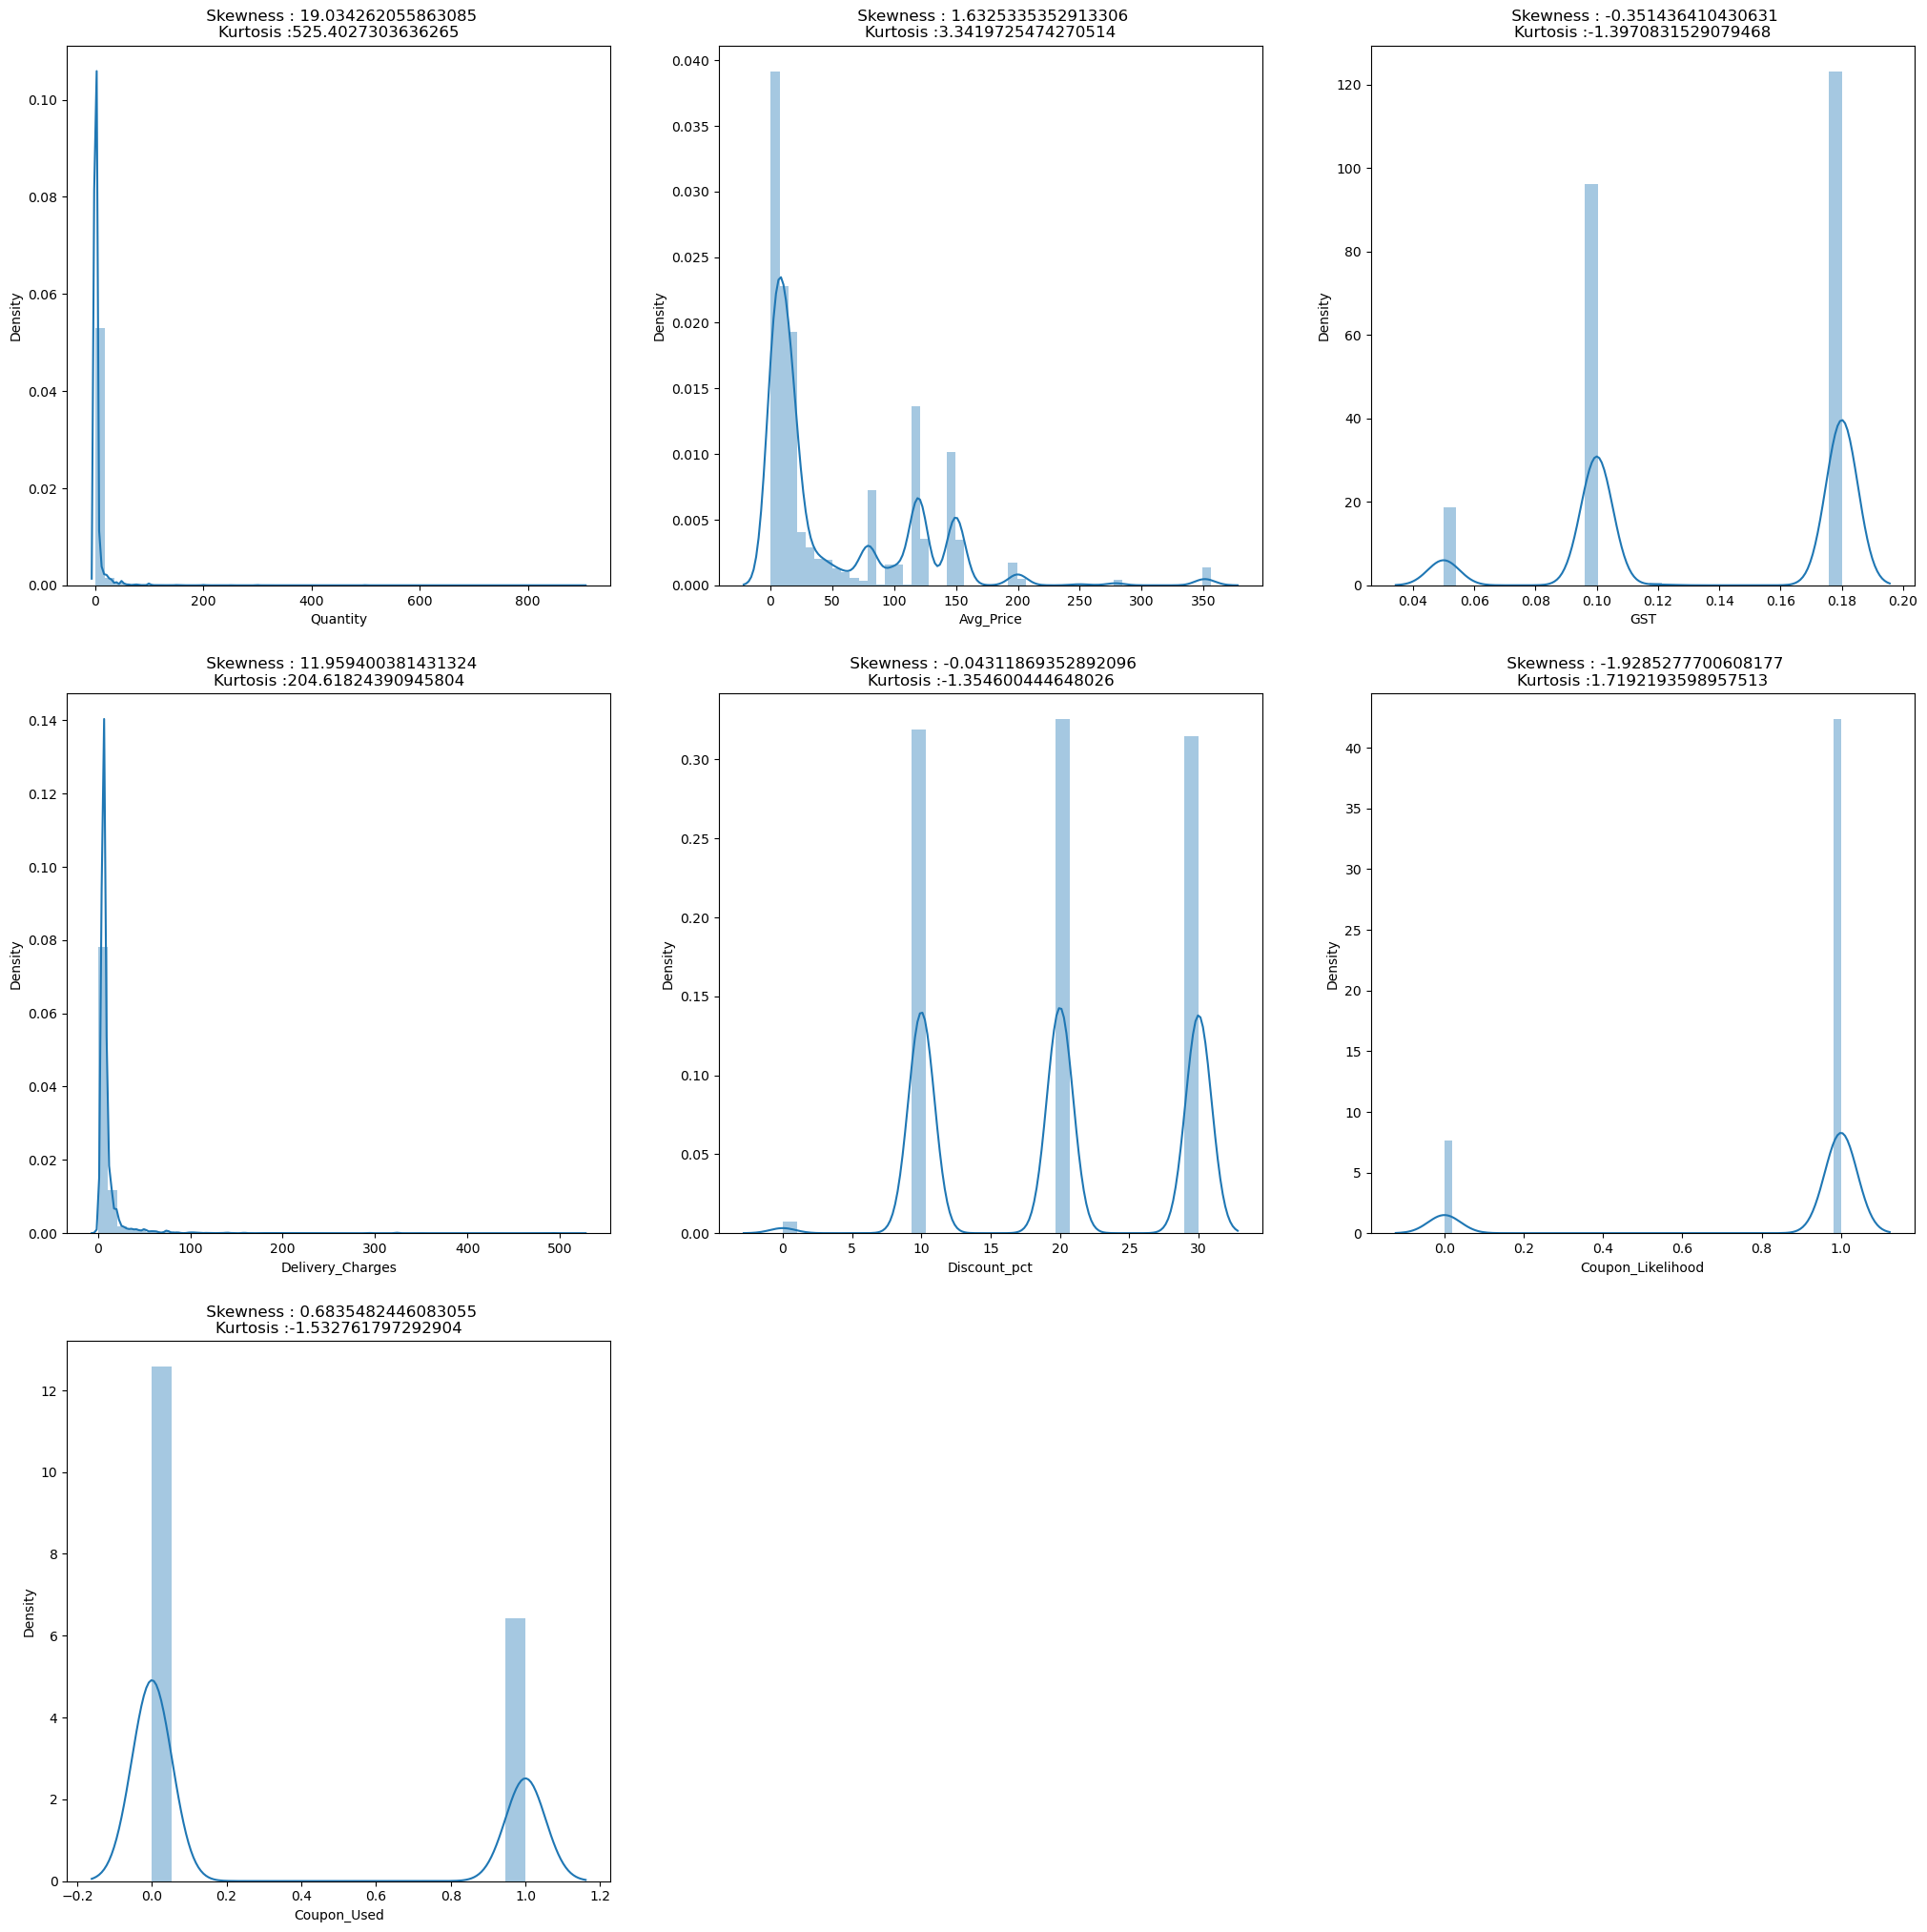

In [38]:
distribution_check(data,numeric_cols)

<p style='color:blue'><b>Outliers</b></p>

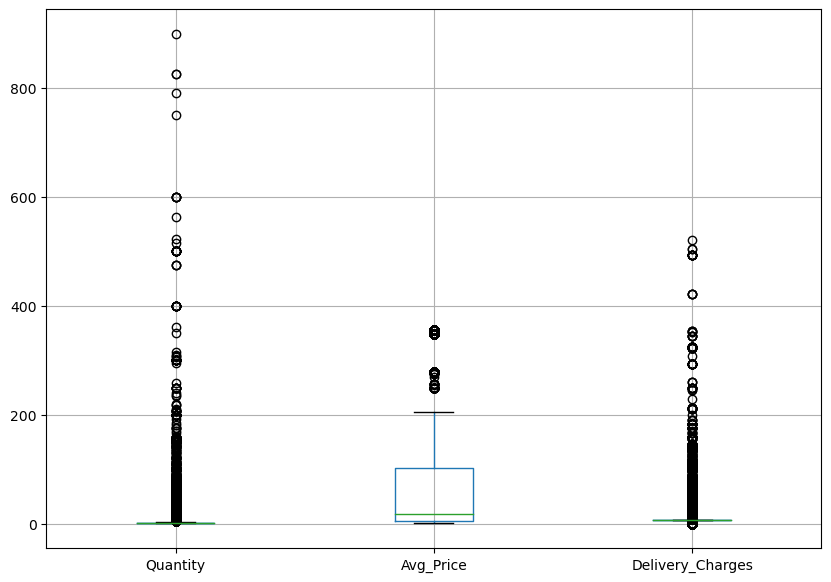

In [39]:
plt.figure(figsize=(10,7))

data.boxplot(column=['Quantity','Avg_Price', 'Delivery_Charges'])

plt.show()

<p style='color:blue'><b>Correlation</b></p>

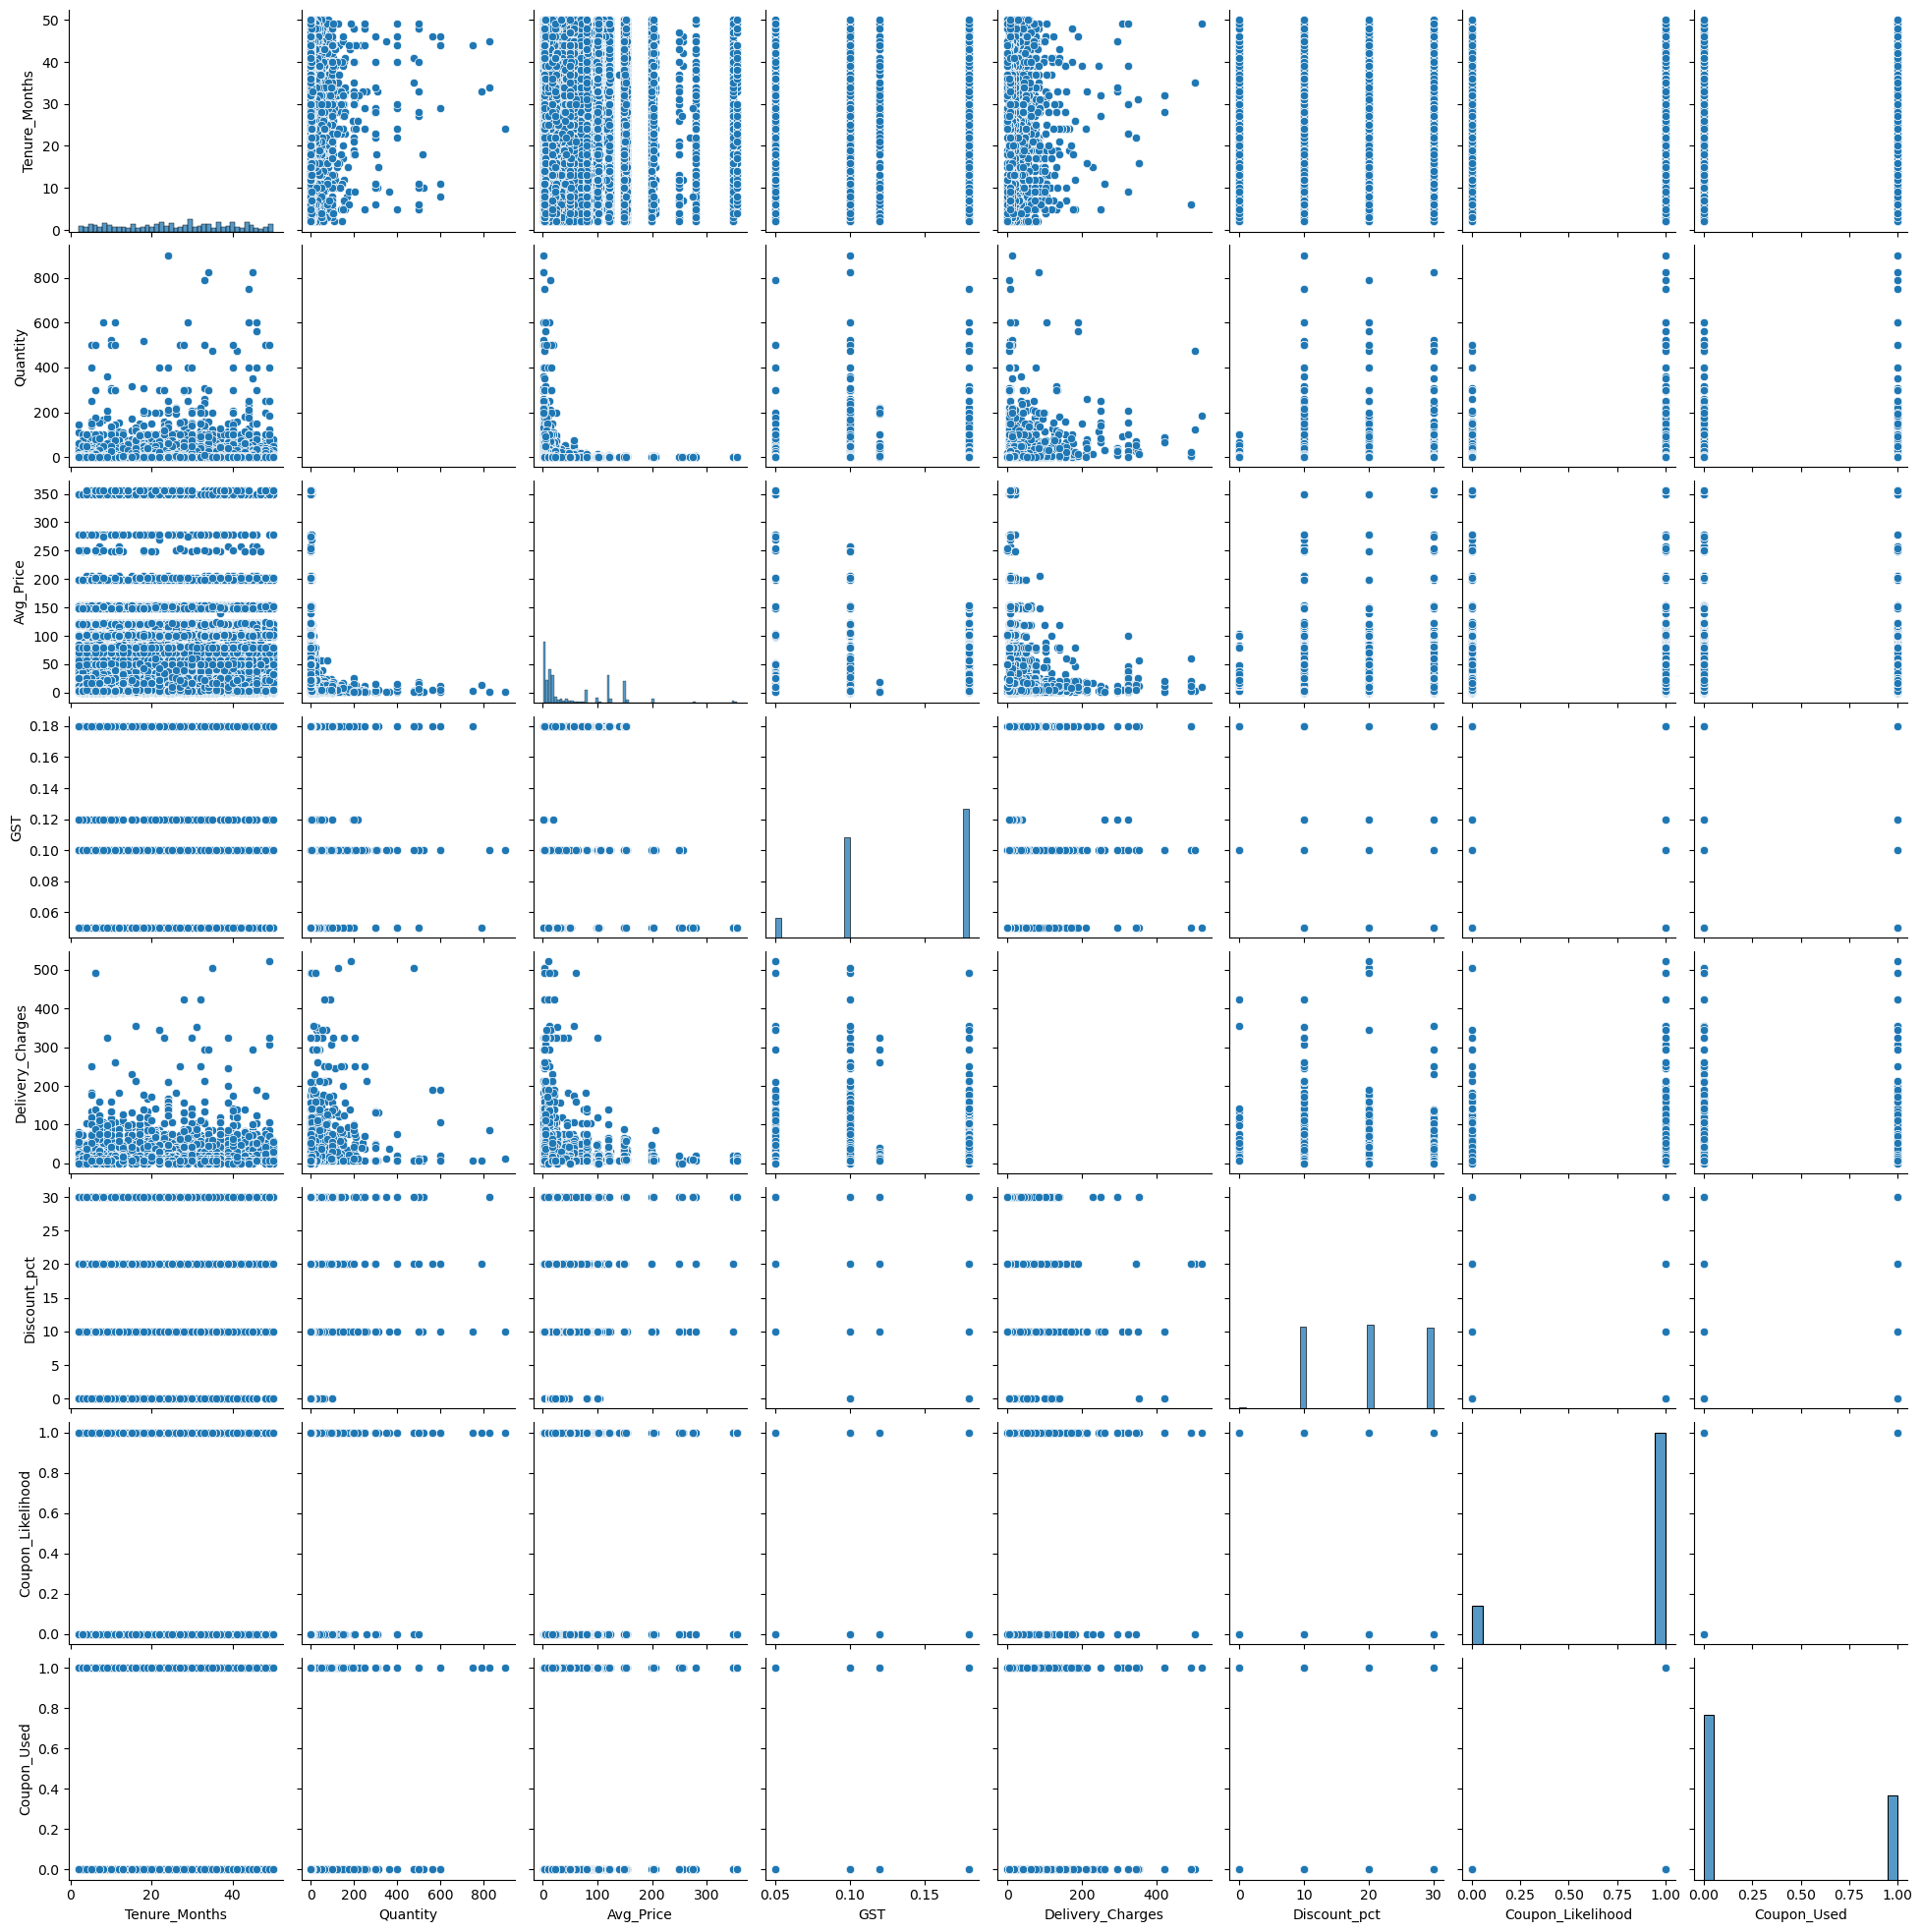

In [40]:
sns.pairplot(data)

plt.show()

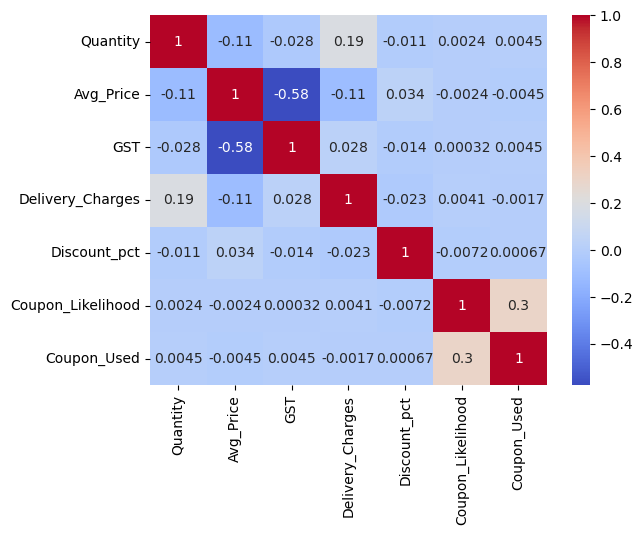

In [41]:
sns.heatmap(data[numeric_cols].corr(),annot=True, cmap='coolwarm')

plt.show()

### Creating Customer_Product Matrix for the RECOMMENDATION MODEL

In [42]:

Prod_temp_data = data[['Product_SKU','Product_Description','Product_Category']].drop_duplicates()

'''

Add Aggregated sales generated by the each product - which can further used to analyse how much sales it can create

'''
Prod_temp_data.head()

,Product_SKU,Product_Description,Product_Category
0,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA
2,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA
3,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA
17,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA
30,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA


In [43]:


product_sales = data.groupby('Product_SKU').agg( Avg_Price = ('Avg_Price','mean')).reset_index()

Product_data = pd.merge(Prod_temp_data, product_sales, on='Product_SKU')

Product_data.head()


,Product_SKU,Product_Description,Product_Category,Avg_Price
0,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,150.981874
1,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,121.806541
2,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,79.838692
3,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,120.214594
4,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,79.748254


In [44]:
def get_coupon_usage_probability(df, product_id):
    
    prod_data = df[df['Product_SKU'] == product_id]
    
    coupon_tries = prod_data['Coupon_Likelihood'].sum()
    
    #print(coupon_tries)
    
    #print(prod_data['Transaction_ID'].nunique())
    
    total_trans = prod_data['Coupon_Likelihood'].count()
    
    #print(total_trans)
    
    probability = round(coupon_tries/total_trans,2)
    
    return probability
    
    

Product_data['Prob_of_Coupon_Usage'] = Product_data['Product_SKU'].apply(lambda x:get_coupon_usage_probability(data,x))

In [45]:
Product_data.to_csv("Data/product_data.csv", index=False)

In [96]:
Product_data.head(2)

,Product_SKU,Product_Description,Product_Category,Avg_Price,Prob_of_Coupon_Usage
0,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,150.981874,0.85
1,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,121.806541,0.84


In [46]:
#product_category_analysis = data.groupby('Product_SKU').agg( Avg_Sales = ('Avg_Price','mean')).reset_index()

In [47]:
customer_data = data.groupby('CustomerID').agg(
    total_transactions = ('Transaction_ID','count'),
    Total_Quantity = ('Quantity','sum'),
    Product_Category_Interest = ('Product_Category','count')
)

customer_data

,total_transactions,Total_Quantity,Product_Category_Interest
CustomerID,,,
12346,2,3,2
12347,60,342,60
12348,23,209,23
12350,17,21,17
12356,36,56,36
...,...,...,...
18259,7,46,7
18260,40,141,40
18269,8,10,8


In [48]:
product_wise = data.groupby(['CustomerID','Product_Category'])['Quantity'].sum().reset_index()

customer_product = product_wise.pivot_table(index='CustomerID', columns='Product_Category', values='Quantity', aggfunc='sum').fillna(0)

customer_product

Product_Category,Accessories,Android,Apparel,Backpacks,Bags,Bottles,Drinkware,Fun,Gift Cards,Google,Headgear,Housewares,Lifestyle,More Bags,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
CustomerID,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
12347,1.0,0.0,231.0,0.0,6.0,0.0,7.0,0.0,0.0,2.0,2.0,0.0,3.0,0.0,2.0,0.0,33.0,0.0,55.0,0.0
12348,0.0,0.0,4.0,0.0,61.0,0.0,76.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,5.0,0.0,54.0,0.0
12350,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,0.0
12356,0.0,0.0,19.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,2.0,0.0,5.0,0.0,21.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259,0.0,0.0,14.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,30.0,0.0,0.0
18260,2.0,0.0,22.0,0.0,3.0,1.0,4.0,13.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,30.0,47.0,3.0
18269,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [49]:
#Creating User Product Matrix for the recommendation system 

'''
Deriving new features like `Purchase_Frequency', 'Quantity', 'Avg_Order_Value'
Aim to create a user interest measure later 

'''

Customer_Product_Matrix = data.groupby(['CustomerID','Product_SKU']).agg(
    Purchase_Frequency=('Transaction_ID','nunique'),
    Total_Quantity=('Quantity','sum'),
    Avg_order_value=('Avg_Price','mean'),
    Last_Transaction=('Transaction_Date','max')
    ).reset_index()

Customer_Product_Matrix.head()

,CustomerID,Product_SKU,Purchase_Frequency,Total_Quantity,Avg_order_value,Last_Transaction
0,12346,GGOEAAAJ080816,1,1,19.99,2019-09-15
1,12346,GGOEGOAR013099,1,2,5.50,2019-09-15
2,12347,GGOEAAEJ035716,1,1,5.25,2019-11-02
3,12347,GGOEAFKA087499,1,1,2.99,2019-11-02
4,12347,GGOEAKDH019899,1,3,3.19,2019-11-01


In [50]:
#Adding Purchase recency to the product based on the transaction history of the data available.

#Customers - Last Purchase date of the ProductSKU to till the transaction date data available


def calculate_recency(main_data, df):
    
    Last_trans_date = main_data['Transaction_Date'].max()
    
    print("We have sales data till :",Last_trans_date)
    
    df['recency'] = (Last_trans_date - df['Last_Transaction']).dt.days
    
    return df

Customer_Product_Matrix = calculate_recency(data, Customer_Product_Matrix)

Customer_Product_Matrix.head()
    

We have sales data till : 2019-12-31 00:00:00


,CustomerID,Product_SKU,Purchase_Frequency,Total_Quantity,Avg_order_value,Last_Transaction,recency
0,12346,GGOEAAAJ080816,1,1,19.99,2019-09-15,107
1,12346,GGOEGOAR013099,1,2,5.50,2019-09-15,107
2,12347,GGOEAAEJ035716,1,1,5.25,2019-11-02,59
3,12347,GGOEAFKA087499,1,1,2.99,2019-11-02,59
4,12347,GGOEAKDH019899,1,3,3.19,2019-11-01,60


In [51]:
'''

Checking the customer data who made high frequent purchases, i.e 47

'''
high_purchase_frequency = Customer_Product_Matrix['Purchase_Frequency'].max()

print("high Purchase Frequency : ",high_purchase_frequency)

Customer_Product_Matrix[Customer_Product_Matrix['Purchase_Frequency']==high_purchase_frequency]

high Purchase Frequency :  47


,CustomerID,Product_SKU,Purchase_Frequency,Total_Quantity,Avg_order_value,Last_Transaction,recency
16377,14911,GGOENEBJ079499,47,67,149.768511,2019-12-21,10


In [52]:
#Checking the customer 14911 purchase history from the sales

data[(data['CustomerID']=='14911') & (data['Product_SKU']=='GGOENEBJ079499')]

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Month,Weekday,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,GST,Delivery_Charges,Coupon_Status,Coupon_Code,Discount_pct,Coupon_Likelihood,Coupon_Used
1251,14911,F,California,34,17638,2019-01-11,Jan,Friday,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,2,153.71,0.1,6.50,Used,ELEC10,10.0,1,1
1252,14911,F,California,34,17640,2019-01-11,Jan,Friday,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,5,153.71,0.1,6.50,Clicked,ELEC10,10.0,1,0
1253,14911,F,California,34,17641,2019-01-11,Jan,Friday,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,2,153.71,0.1,6.50,Used,ELEC10,10.0,1,1
1259,14911,F,California,34,17649,2019-01-11,Jan,Friday,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,0.1,6.50,Used,ELEC10,10.0,1,1
1267,14911,F,California,34,19745,2019-02-06,Feb,Wednesday,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,149.00,0.1,6.50,Not Used,ELEC20,20.0,0,0
1268,14911,F,California,34,19746,2019-02-06,Feb,Wednesday,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,149.00,0.1,6.50,Clicked,ELEC20,20.0,1,0
1270,14911,F,California,34,19753,2019-02-06,Feb,Wednesday,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,149.00,0.1,35.30,Clicked,ELEC20,20.0,1,0
1273,14911,F,California,34,19755,2019-02-06,Feb,Wednesday,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,149.00,0.1,6.50,Not Used,ELEC20,20.0,0,0
1274,14911,F,California,34,19756,2019-02-06,Feb,Wednesday,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,149.00,0.1,6.50,Clicked,ELEC20,20.0,1,0
1276,14911,F,California,34,19759,2019-02-06,Feb,Wednesday,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,3,149.00,0.1,6.50,Used,ELEC20,20.0,1,1


In [53]:
Customer_Product_Matrix[(Customer_Product_Matrix['CustomerID']=='14911')].sort_values(by='recency', ascending=False).head(10)

,CustomerID,Product_SKU,Purchase_Frequency,Total_Quantity,Avg_order_value,Last_Transaction,recency
16212,14911,GGOEAAWC062448,1,1,14.02,2019-01-11,354
16248,14911,GGOEGADB057316,1,1,61.89,2019-01-11,354
16213,14911,GGOEAAWN062648,1,1,14.02,2019-01-11,354
16328,14911,GGOEGDHC082299,1,1,11.19,2019-02-05,329
16278,14911,GGOEGAER033214,1,1,19.99,2019-02-05,329
16266,14911,GGOEGAEC033114,1,1,19.99,2019-02-05,329
16403,14911,GGOEYAQB073215,1,1,44.79,2019-02-06,328
16309,14911,GGOEGAYQ069025,1,1,18.99,2019-02-06,328
16401,14911,GGOEYAFB073114,1,1,44.79,2019-02-06,328
16400,14911,GGOEYAFB073113,1,1,55.99,2019-02-06,328


In [54]:
Customer_Product_Matrix.head()

,CustomerID,Product_SKU,Purchase_Frequency,Total_Quantity,Avg_order_value,Last_Transaction,recency
0,12346,GGOEAAAJ080816,1,1,19.99,2019-09-15,107
1,12346,GGOEGOAR013099,1,2,5.50,2019-09-15,107
2,12347,GGOEAAEJ035716,1,1,5.25,2019-11-02,59
3,12347,GGOEAFKA087499,1,1,2.99,2019-11-02,59
4,12347,GGOEAKDH019899,1,3,3.19,2019-11-01,60


In [55]:
Customer_Product_Matrix.describe()

,Purchase_Frequency,Total_Quantity,Avg_order_value,Last_Transaction,recency
count,37665.000000,37665.000000,37665.000000,37665,37665.000000
mean,1.405124,6.319740,35.743358,2019-07-07 11:18:57.491039744,176.528501
min,1.000000,1.000000,0.400000,2019-01-01 00:00:00,0.000000
25%,1.000000,1.000000,4.800000,2019-04-18 00:00:00,101.000000
50%,1.000000,1.000000,13.590000,2019-07-16 00:00:00,168.000000
75%,1.000000,3.000000,33.590000,2019-09-21 00:00:00,257.000000
max,47.000000,930.000000,355.740000,2019-12-31 00:00:00,364.000000
std,1.449988,24.881373,53.979562,NaN,97.969155


In [56]:
Customer_Product_Matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37665 entries, 0 to 37664
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          37665 non-null  object        
 1   Product_SKU         37665 non-null  object        
 2   Purchase_Frequency  37665 non-null  int64         
 3   Total_Quantity      37665 non-null  int64         
 4   Avg_order_value     37665 non-null  float64       
 5   Last_Transaction    37665 non-null  datetime64[ns]
 6   recency             37665 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 2.0+ MB


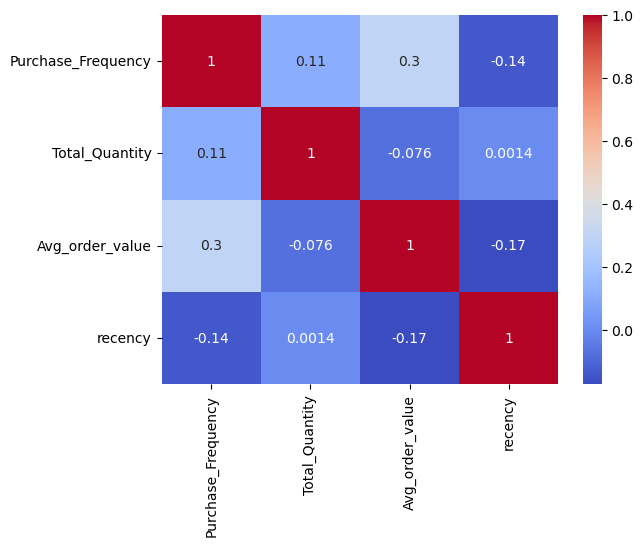

In [57]:
numeric_cols = ['Purchase_Frequency', 'Total_Quantity', 'Avg_order_value', 'recency']

sns.heatmap(Customer_Product_Matrix[numeric_cols].corr(),annot=True, cmap='coolwarm')

plt.show()

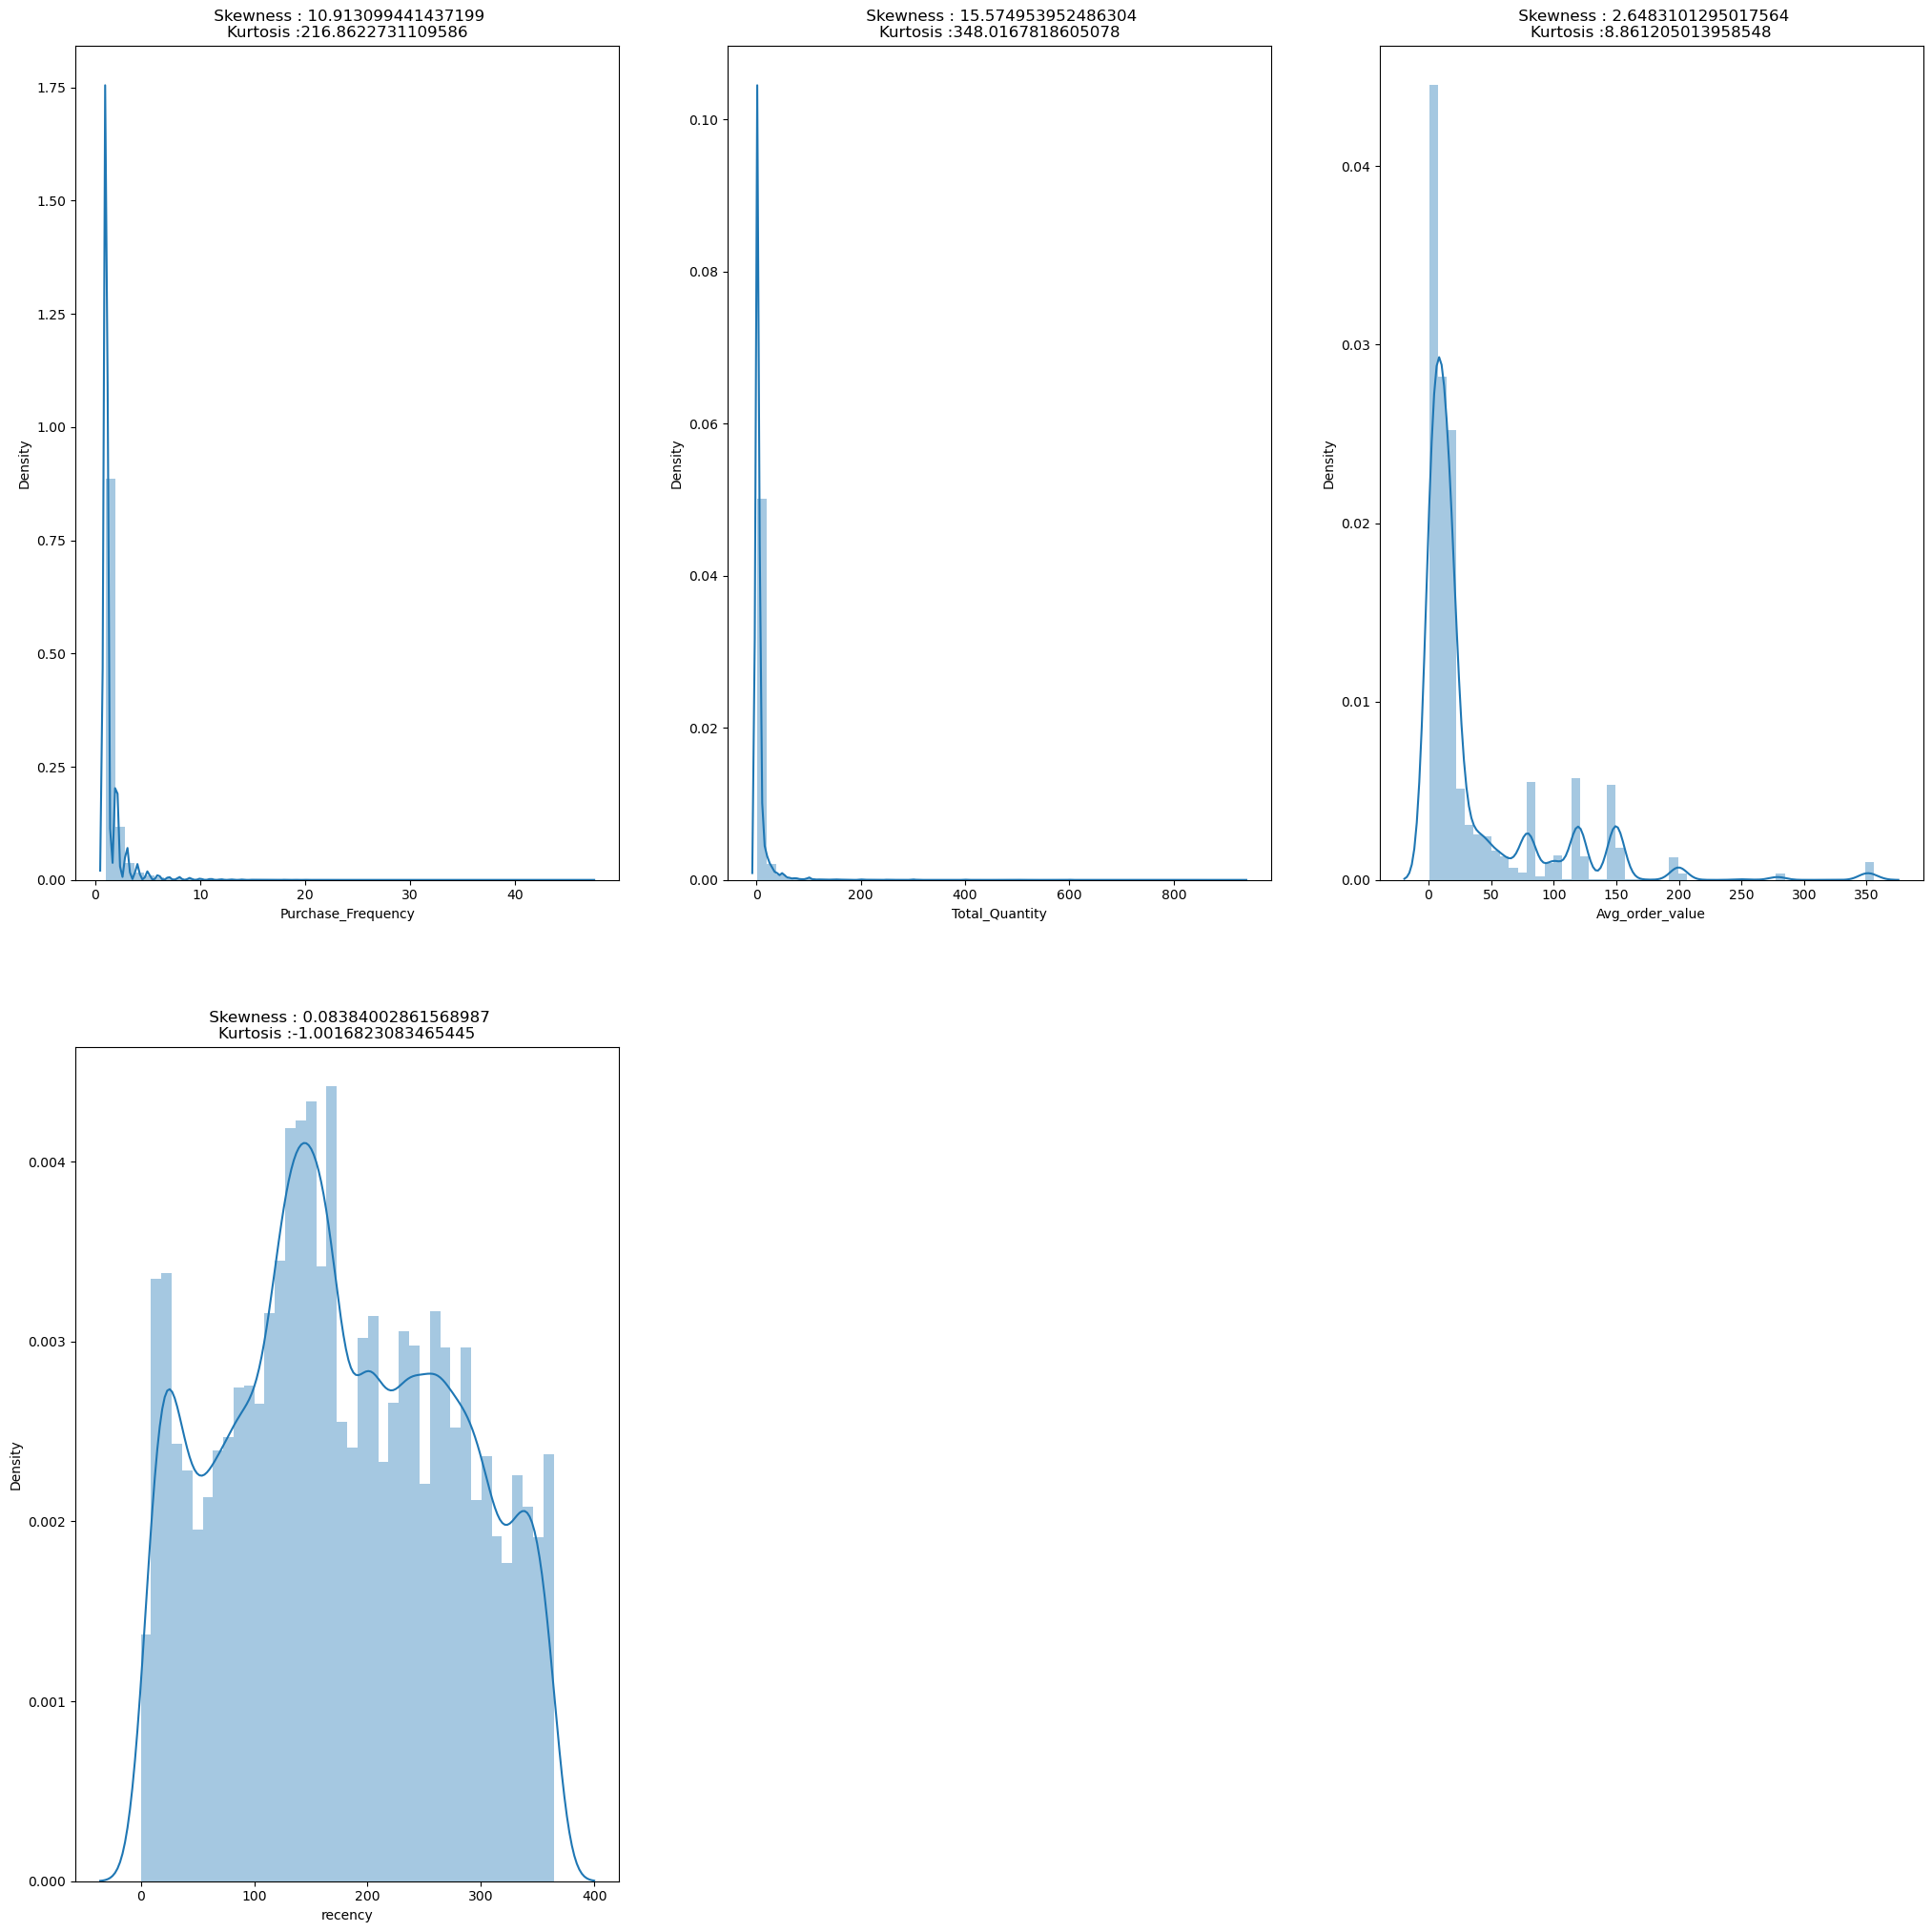

In [58]:
distribution_check(Customer_Product_Matrix,numeric_cols)

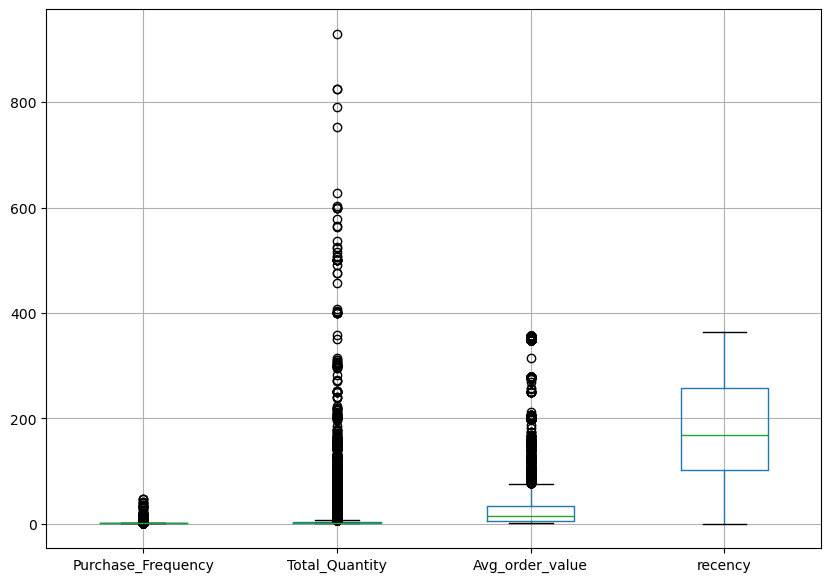

In [59]:
plt.figure(figsize=(10,7))

Customer_Product_Matrix.boxplot(column=numeric_cols)

plt.show()

In [60]:
Customer_Product_Matrix.columns

Index(['CustomerID', 'Product_SKU', 'Purchase_Frequency', 'Total_Quantity',
       'Avg_order_value', 'Last_Transaction', 'recency'],
      dtype='object')

In [61]:
customer_product_data = Customer_Product_Matrix.copy()

customer_product_data = Customer_Product_Matrix[['CustomerID', 'Product_SKU', 'recency']]

<b>Normalizing the numeric data in the Customer_Product_Matrix</b>

In [62]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler

scaler = MinMaxScaler()

scale_columns = ['recency']

customer_product_data[scale_columns] = scaler.fit_transform(customer_product_data[scale_columns])

customer_product_data.head()

,CustomerID,Product_SKU,recency
0,12346,GGOEAAAJ080816,0.293956
1,12346,GGOEGOAR013099,0.293956
2,12347,GGOEAAEJ035716,0.162088
3,12347,GGOEAFKA087499,0.162088
4,12347,GGOEAKDH019899,0.164835


In [63]:
customer_product_data.describe()

,recency
count,37665.000000
mean,0.484968
std,0.269146
min,0.000000
25%,0.277473
50%,0.461538
75%,0.706044
max,1.000000


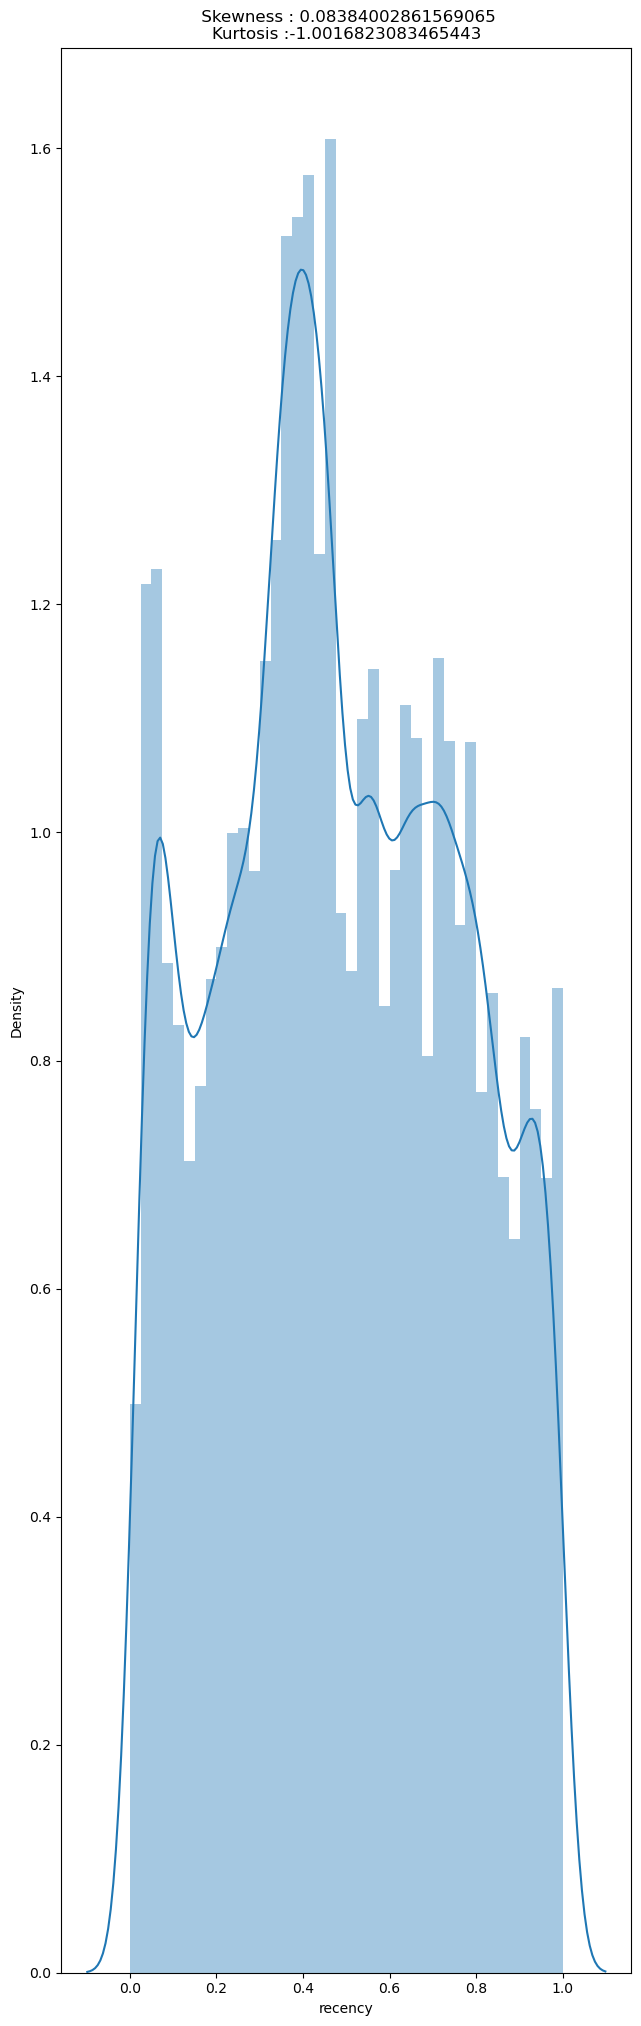

In [64]:
distribution_check(customer_product_data,['recency'])

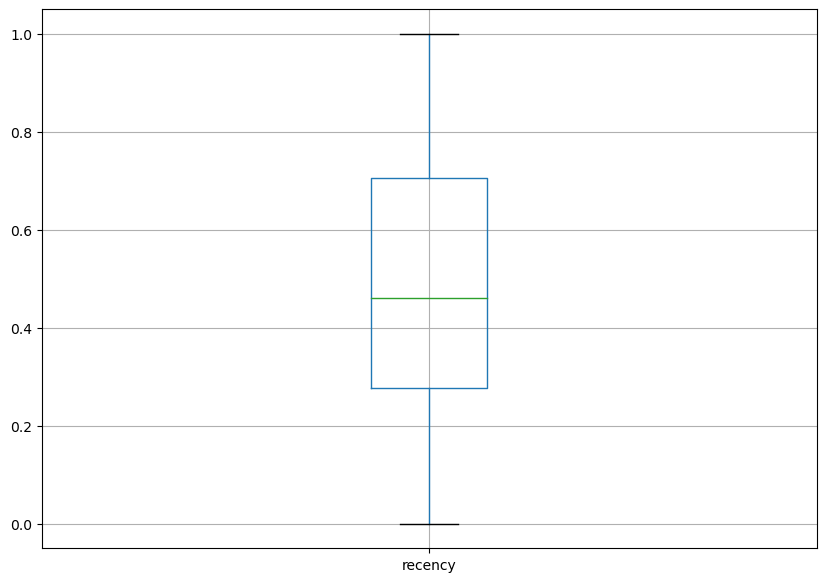

In [65]:
plt.figure(figsize=(10,7))

customer_product_data.boxplot(column=['recency'])

plt.show()

In [66]:
customer_product_data['recency'].value_counts().sort_index()

recency
0.000000     43
0.002747     37
0.005495     48
0.008242     44
0.010989     71
           ... 
0.989011    131
0.991758     97
0.994505    104
0.997253     58
1.000000     47
Name: count, Length: 365, dtype: int64

### <b>Creating Sparse Matrix</b>

In [67]:
from scipy.sparse import csr_matrix

def build_sparse_matrix(df):
    
    C = df['CustomerID'].nunique()
    P = df['Product_SKU'].nunique()
    
    cust_mapper = dict(zip(np.unique(df['CustomerID']), list(range(C))))
    prod_mapper = dict(zip(np.unique(df['Product_SKU']), list(range(P))))
    
    cust_inv_mapper = dict(zip( list(range(C)), np.unique(df['CustomerID'])))
    prod_inv_mapper = dict(zip(list(range(P)), np.unique(df['Product_SKU'])))
    
    cust_index = [cust_mapper[i] for i in df['CustomerID']]
    prod_index = [prod_mapper[i] for i in df['Product_SKU']]
    
    X = csr_matrix((df['recency'],(cust_index, prod_index)), shape=(C,P))
    
    return X, cust_mapper, prod_mapper, cust_inv_mapper, prod_inv_mapper

X, cust_mapper, prod_mapper, cust_inv_mapper, prod_inv_mapper = build_sparse_matrix(customer_product_data)



In [68]:
X.shape

(1468, 1145)

In [69]:
n_total = X.shape[0]*X.shape[1]
n_recency = X.nnz
print("Number of non zero elements available: ",n_recency)
sparsity = (1-n_recency/n_total)
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Number of non zero elements available:  37665
Matrix sparsity: 97.76%


In [70]:
print(n_total," , ", n_recency)

1680860  ,  37665


In [71]:
n_interests_per_user = X.getnnz(axis=1)
len(n_interests_per_user)

1468

In [72]:
data.groupby(['CustomerID']).agg(UniqueProducts=('Product_SKU','nunique')).reset_index().sort_values(by='UniqueProducts',
                                                                                                     ascending=False)

,CustomerID,UniqueProducts
118,12748,308
563,14606,286
1355,17841,267
736,15311,237
643,14911,209
...,...,...
774,15468,1
781,15510,1
1408,18017,1
68,12586,1


In [73]:
print(f"Most active customers interested in {n_interests_per_user.max()} products.")
print(f"Least active customers interested in {n_interests_per_user.min()} products.")

Most active customers interested in 308 products.
Least active customers interested in 1 products.


In [74]:
n_interests_per_product = X.getnnz(axis=0)
len(n_interests_per_product)

1145

In [75]:
data.groupby(['Product_SKU']).agg(UniqueUsers=('CustomerID','nunique')).reset_index().sort_values(by='UniqueUsers',
                                                                                                     ascending=False)

,Product_SKU,UniqueUsers
976,GGOENEBB078899,953
981,GGOENEBJ079499,952
983,GGOENEBQ078999,950
984,GGOENEBQ079099,642
985,GGOENEBQ079199,567
...,...,...
1014,GGOEWALJ083416,1
1011,GGOEWALJ083413,1
432,GGOEGAEE031013,1
799,GGOEGAXR066029,1


In [76]:
print(f"Most interested product has {n_interests_per_product.max()} user impressions.")
print(f"Least interested product has {n_interests_per_product.min()} user impressions.")

Most interested product has 953 user impressions.
Least interested product has 1 user impressions.


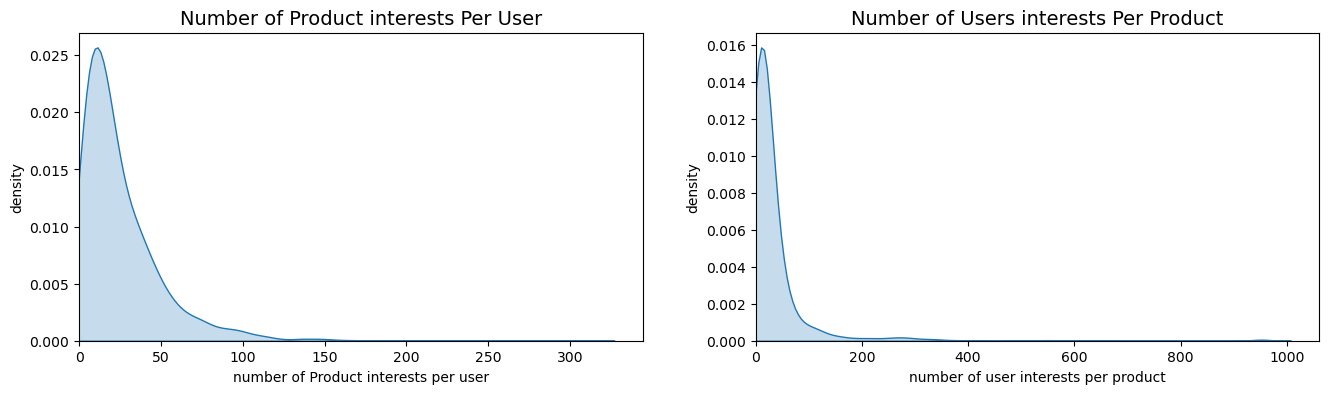

In [77]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_interests_per_user, shade=True)
plt.xlim(0)
plt.title("Number of Product interests Per User", fontsize=14)
plt.xlabel("number of Product interests per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(n_interests_per_product, shade=True)
plt.xlim(0)
plt.title("Number of Users interests Per Product", fontsize=14)
plt.xlabel("number of user interests per product")
plt.ylabel("density")
plt.show()

### <b>Product Recommendations with KNN </b>

In [78]:
from sklearn.neighbors import NearestNeighbors

def get_product_recommendations(prod_id, X, prod_mapper, prod_inv_mapper, k, metric = 'cosine'):
    
    X = X.T
    
    # print(X[:5])
    
    neighbour_ids = []
    
    prod_ind = prod_mapper[prod_id]
    
    # print(prod_ind) #
    
    prod_vec = X[prod_ind]
    
    # print(prod_vec) #
    
    if isinstance(prod_vec, (np.ndarray)):
        prod_vec = prod_vec.reshape(1,-1)
        
    # use k+1 since kNN output includes the product Id of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    
    kNN.fit(X)
    
    
    '''
    
    # Find the indices and distances of the k nearest neighbors to the user
    distances, indices = kNN.kneighbors(X[cust_ind])

    # Extract the interests of the nearest neighbors for the given product
    neighbor_interests = X[indices.flatten(), prod_ind]

    # Predict the user's interest in the product by averaging the interests of the nearest neighbors
    predicted_interest = neighbor_interests.mean()

    print("Predicted interest for user", cust_id, "and product", prod_id, ":", predicted_interest)
    
    '''
    
    
    neighbour = kNN.kneighbors(prod_vec, return_distance=False)
    
    for i in range(0,k):
        
        n = neighbour.item(i)
        
        neighbour_ids.append(prod_inv_mapper[n])
        #print(prod_inv_mapper[n])
        
    neighbour_ids.pop(0)
    return neighbour_ids

In [79]:
prod_id = 'GGOEGALQ058116' #'GGOENEBQ079199'

product_recommendations = get_product_recommendations( prod_id, X, prod_mapper, prod_inv_mapper, k=5)

print(product_recommendations)

search_product = Product_data[Product_data['Product_SKU']==prod_id]['Product_Description'].values

product_desc = pd.Series([Product_data[Product_data['Product_SKU']==i]['Product_Description'] 
                           for i in product_recommendations ])



print("\n\nSince you are checking the product: ",search_product, " you might like below:\n", )
for desc in product_desc:
    print("\n",desc.values)


['GGOEAAWN062648', 'GGOEGAXC065630', 'GGOEGAAL059013', 'GGOEAAYC068725']


Since you are checking the product:  ["Google Women's Colorblock Tee White"]  you might like below:


 ['Android Infant Short Sleeve Tee Pink']

 ['Google Toddler Hoodie Royal Blue']

 ["Google Men's Short Sleeve Performance Badge Tee Navy"]

 ['Android Youth Short Sleeve T-shirt Aqua']


### <b>Applying the Matrix_Factorization to deal with Sparsity</b>

In [80]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=6, n_iter=10)
Q = svd.fit_transform(X.T)
Q.shape

(1145, 6)

import matplotlib.pyplot as plt
plt.plot(np.cumsum(Q.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [81]:
prod_id = 'GGOEGALQ058116'

similar_products = get_product_recommendations(prod_id, Q.T, prod_mapper, prod_inv_mapper, metric='cosine', k=5)

search_product = Product_data[Product_data['Product_SKU']==prod_id]['Product_Description'].values

product_desc = pd.Series([Product_data[Product_data['Product_SKU']==i]['Product_Description'] 
                           for i in similar_products ])



print("\n\nSince you are checking the product: ",search_product, " you might like below:\n", )
for desc in product_desc:
    print("\n",desc.values)




Since you are checking the product:  ["Google Women's Colorblock Tee White"]  you might like below:


 ["Android Men's Vintage Tank"]

 ["Google Women's Short Sleeve Performance Tee Charcoal"]

 ["Google Women's Softshell Jacket Black/Grey"]

 ["Google Women's Yoga Pants"]


### <b>Content-based filtering</b>

In [82]:
Product_data.reset_index()

Product_data.head(3)

,Product_SKU,Product_Description,Product_Category,Avg_Price,Prob_of_Coupon_Usage
0,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,150.981874,0.85
1,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,121.806541,0.84
2,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,79.838692,0.86


In [83]:
product_categories = Product_data['Product_Category'].unique()
print("We have ", len(product_categories)," categories which are :\n",product_categories)

print("we have ", Product_data['Product_SKU'].nunique()," Products")

We have  20  categories which are :
 ['Nest-USA' 'Office' 'Apparel' 'Bags' 'Drinkware' 'Lifestyle' 'Waze'
 'Headgear' 'Fun' 'Google' 'Notebooks & Journals' 'Backpacks'
 'Nest-Canada' 'Housewares' 'Bottles' 'Nest' 'Android' 'Accessories'
 'Gift Cards' 'More Bags']
we have  1145  Products


In [84]:
dummy_data = pd.get_dummies(Product_data['Product_Category'])

dummy_data = dummy_data.astype(int)

prod_df = pd.concat([Product_data, dummy_data], axis =1)

prod_cat_df = prod_df.drop(columns=['Product_SKU','Product_Description','Product_Category'])

prod_df.head(2)

,Product_SKU,Product_Description,Product_Category,Avg_Price,Prob_of_Coupon_Usage,Accessories,Android,Apparel,Backpacks,Bags,...,Headgear,Housewares,Lifestyle,More Bags,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
0,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,150.981874,0.85,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,121.806541,0.84,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [85]:
prod_cat_df.head(2)

,Avg_Price,Prob_of_Coupon_Usage,Accessories,Android,Apparel,Backpacks,Bags,Bottles,Drinkware,Fun,...,Headgear,Housewares,Lifestyle,More Bags,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
0,150.981874,0.85,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,121.806541,0.84,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [86]:
product_idx = dict(zip(Product_data['Product_SKU'], list(Product_data.index)))

sample_product_idx = ', '.join(f"{key}: {value}" for key, value in list(product_idx.items())[:3])

print(sample_product_idx)

GGOENEBJ079499: 0, GGOENEBQ078999: 1, GGOENEBQ079099: 2


In [87]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(prod_cat_df, prod_cat_df)

print(f"Dimensions of our genres cosine similarity matrix: {cosine_sim.shape}")

Dimensions of our genres cosine similarity matrix: (1145, 1145)


In [88]:
def get_prod_desc(df,index):
    
    prod_desc =df.at[index, 'Product_Description']
    
    return prod_desc

def get_prod_sales(df,index):
    
    prod_sales = round(df.at[index, 'Avg_Price'],2)
    
    return prod_sales

def get_prod_coupon_usage(df,index):
    
    prod_coupon_usage = round(df.at[index, 'Prob_of_Coupon_Usage'],2)
    
    return prod_coupon_usage


def get_content_based_product_recommendations(prod_id, n_recommendations=5):
    
    index = product_idx[prod_id]
    
    prod_desc = get_prod_desc(Product_data, index) #Product_data.at[index, 'Product_Description']
    
    prod_sales = get_prod_sales(Product_data,index)
    
    prod_coup = get_prod_coupon_usage(Product_data,index)
    
    sim_scores = list(enumerate(cosine_sim[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:(n_recommendations+1)]
    
    similar_products = [i[0] for i in sim_scores]
    
    print(f"Because you are looking at {prod_desc},\nDetails - ${prod_sales} , coupon usage prob% {prod_coup}:\n\n")
    print("you might like:\n")
    for id in similar_products:
        print("\n",get_prod_desc(Product_data,id)," \n Details- $",get_prod_sales(Product_data,id), "coupon usage% - ",get_prod_coupon_usage(Product_data,id))
    #print(Product_data['Product_Description'].iloc[similar_products])

In [89]:
prod_id = 'GGOEGALQ058116' #'GGOENEBQ078999'

'''
print(Product_data[(Product_data['Product_SKU']==prod_id)].index)
index = product_idx[prod_id]
print(product_idx[prod_id])

print(Product_data.at[index, 'Product_Description'])
'''

get_content_based_product_recommendations(prod_id,5)

Because you are looking at Google Women's Colorblock Tee White,
Details - $27.99 , coupon usage prob% 1.0:


you might like:


 Google Men's Colorblock Tee White/Heather  
 Details- $ 27.69 coupon usage% -  1.0

 Google Women's 1/4 Zip Jacket Charcoal  
 Details- $ 28.88 coupon usage% -  1.0

 YouTube Men's Long Sleeve Pullover Badge Tee Heather  
 Details- $ 28.88 coupon usage% -  1.0

 Google Men's Airflow 1/4 Zip Pullover Lapis  
 Details- $ 27.02 coupon usage% -  1.0

 Google Men's Microfiber 1/4 Zip Pullover Blue/Indigo  
 Details- $ 26.62 coupon usage% -  0.95


In [90]:
prod_id = 'GGOENEBQ078999'

'''
print(Product_data[(Product_data['Product_SKU']==prod_id)].index)
index = product_idx[prod_id]
print(product_idx[prod_id])

print(Product_data.at[index, 'Product_Description'])
'''

get_content_based_product_recommendations(prod_id,5)

Because you are looking at Nest Cam Outdoor Security Camera - USA,
Details - $121.81 , coupon usage prob% 0.84:


you might like:


 Nest Cam Indoor Security Camera - USA  
 Details- $ 120.21 coupon usage% -  0.84

 Nest Learning Thermostat 3rd Gen-USA - Copper  
 Details- $ 149.56 coupon usage% -  0.85

 Nest Learning Thermostat 3rd Gen-USA - White  
 Details- $ 149.64 coupon usage% -  0.84

 Nest Learning Thermostat 3rd Gen-USA - Stainless Steel  
 Details- $ 150.98 coupon usage% -  0.85

 Nest Protect Smoke + CO Black Wired Alarm-USA  
 Details- $ 92.52 coupon usage% -  0.68


### THE END

In [91]:
def get_user_product_recency(df, cust_id,prod_id):
    
    recency = df[(df['CustomerID']== cust_id) & (customer_product_data['Product_SKU']==prod_id)]['recency']
    
    return recency
    
cust_id = '12347'

prod_id = 'GGOENEBQ079099'

get_user_product_recency(customer_product_data, cust_id, prod_id)

36    0.162088
Name: recency, dtype: float64

In [92]:
def get_cust_index(cust_id, cust_mapper):
    
    cust_ind = cust_mapper[cust_id]
    
    return cust_ind


def get_prod_index(prod_id, prod_mapper):
    
    prod_ind = prod_mapper[prod_id]
    
    return prod_ind



In [93]:
cust_id = '12347'

prod_id = 'GGOENEBJ079499'

cust_ind = get_cust_index(cust_id, cust_mapper)

prod_ind = get_prod_index(prod_id, prod_mapper)

print("for the (",cust_id,",",prod_id,")"," this is the index -(",cust_ind,",",prod_ind,")")

for the ( 12347 , GGOENEBJ079499 )  this is the index -( 1 , 981 )


In [94]:
k = 5

model = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='cosine')

model.fit(X)


NearestNeighbors(algorithm='brute', metric='cosine')

In [95]:
# Find the indices and distances of the k nearest neighbors to the user
distances, indices = model.kneighbors(X[cust_ind])

# Extract the interests of the nearest neighbors for the given product
neighbor_interests = X[indices.flatten(), prod_ind]

# Predict the user's interest in the product by averaging the interests of the nearest neighbors
predicted_interest = neighbor_interests.mean()

print("Predicted interest for user", cust_id, "and product", prod_id, ":", predicted_interest)

Predicted interest for user 12347 and product GGOENEBJ079499 : 0.19670329670329673


Customer_Product_Matrix[Customer_Product_Matrix['Product_SKU']==prod_id][['CustomerID','Purchase_Frequency']].sort_values(by='Purchase_Frequency',ascending=False).head(5)

customer_purchases = Customer_Product_Matrix[Customer_Product_Matrix['CustomerID']=='14606']['Product_SKU']

yes_cust_purchase = [prod for prod in product_recommendations if prod in customer_purchases]

print(yes_cust_purchase)
